# 01. Importing Libraries

In [3]:
!pip install quandl

In [17]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [18]:
# Configure API key 

quandl.ApiConfig.api_key = '1dtzNxfBzZZsWTKd1KVQ'

#### I keep receiving an error message every time I try to call the API. Below, I tried what was provided in the task documentation and you can see I'm still getting an error for that, so I have done this assignment using a workaround instead.

In [19]:
# Importing the Federal Reserve Economic Data "Natural Rate of Unemployment" variable.

data = quandl.get('FRED/NROU')

QuandlError: (Status 403) Something went wrong. Please try again. If you continue to have problems, please contact us at connect@quandl.com.

# 02. Importing Data

### The work-around I'll be using is simply downloading the data set from this website: https://fred.stlouisfed.org/series/LNU04027662 and importing the data as normal.

In [20]:
path = r'C:\Users\Rebecca\Library Funding and Literacy Rates'

In [21]:
path

'C:\\Users\\Rebecca\\Library Funding and Literacy Rates'

In [22]:
data = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'UnemploymentRate.csv'), index_col = False)

In [23]:
data.head(5)

,observation_date,LNU04027662
0,1992-01-01,3.2
1,1992-02-01,3.3
2,1992-03-01,2.9
3,1992-04-01,2.9
4,1992-05-01,2.9


In [24]:
data.shape

(403, 2)

In [25]:
data.columns

Index(['observation_date', 'LNU04027662'], dtype='object')

In [26]:
# Renaming column 

data = data.rename(columns={"LNU04027662": "UnemploymentRate_BachelorsPlus"})

In [39]:
# Renaming column 

data2 = data.rename(columns={"observation_date": "Date"})

In [40]:
data.head(5)

,Date,UnemploymentRate_BachelorsPlus
0,1992-01-01,3.2
1,1992-02-01,3.3
2,1992-03-01,2.9
3,1992-04-01,2.9
4,1992-05-01,2.9


In [41]:
type(data)

pandas.core.frame.DataFrame

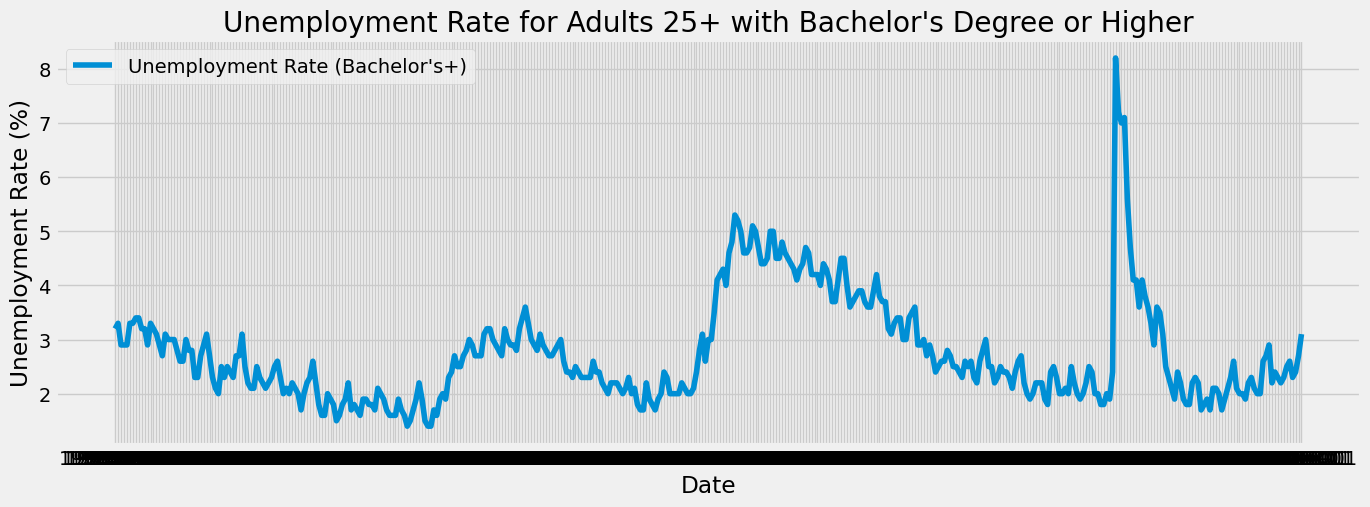

In [43]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100)

plt.plot(data["Date"], data["UnemploymentRate_BachelorsPlus"], label="Unemployment Rate (Bachelor's+)")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.title("Unemployment Rate for Adults 25+ with Bachelor's Degree or Higher")
plt.legend()
plt.show()

# 03. Subsetting and Wrangling Data

In [44]:
# Reset index so that you can use the "Date" column as a filter

data_2 = data.reset_index()

In [45]:
data_2.head()

,index,Date,UnemploymentRate_BachelorsPlus
0,0,1992-01-01,3.2
1,1,1992-02-01,3.3
2,2,1992-03-01,2.9
3,3,1992-04-01,2.9
4,4,1992-05-01,2.9


In [51]:
# Finding the min date

data_2.min()

index                                      0
Date                              1992-01-01
UnemploymentRate_BachelorsPlus           1.4
dtype: object

In [52]:
# Finding the max date

data_2.max()

index                                    402
Date                              2025-07-01
UnemploymentRate_BachelorsPlus           8.2
dtype: object

In [48]:
# Creating subgroup of data. 

data_sub = data_2.loc[(data_2['Date'] >= '2012-01-01') & (data_2['Date'] < '2025-07-01')]

### The PIAAC dataset pulls data from 2012/2014/2017, which is why I created a subset of data that starts at 2012 - to match the same date range. I don't think anything prior to 2012 would be useful. 

In [49]:
data_sub.shape

(162, 3)

In [50]:
data_sub.head()

,index,Date,UnemploymentRate_BachelorsPlus
240,240,2012-01-01,4.4
241,241,2012-02-01,4.3
242,242,2012-03-01,4.1
243,243,2012-04-01,3.7
244,244,2012-05-01,3.7


In [53]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,index,UnemploymentRate_BachelorsPlus
datetime,,
2012-01-01,240,4.4
2012-02-01,241,4.3
2012-03-01,242,4.1
2012-04-01,243,3.7
2012-05-01,244,3.7


In [58]:
# Drop the index column 

data_sub.drop(['index'], axis=1, inplace=True)

In [59]:
data_sub.head()

,UnemploymentRate_BachelorsPlus
datetime,
2012-01-01,4.4
2012-02-01,4.3
2012-03-01,4.1
2012-04-01,3.7
2012-05-01,3.7


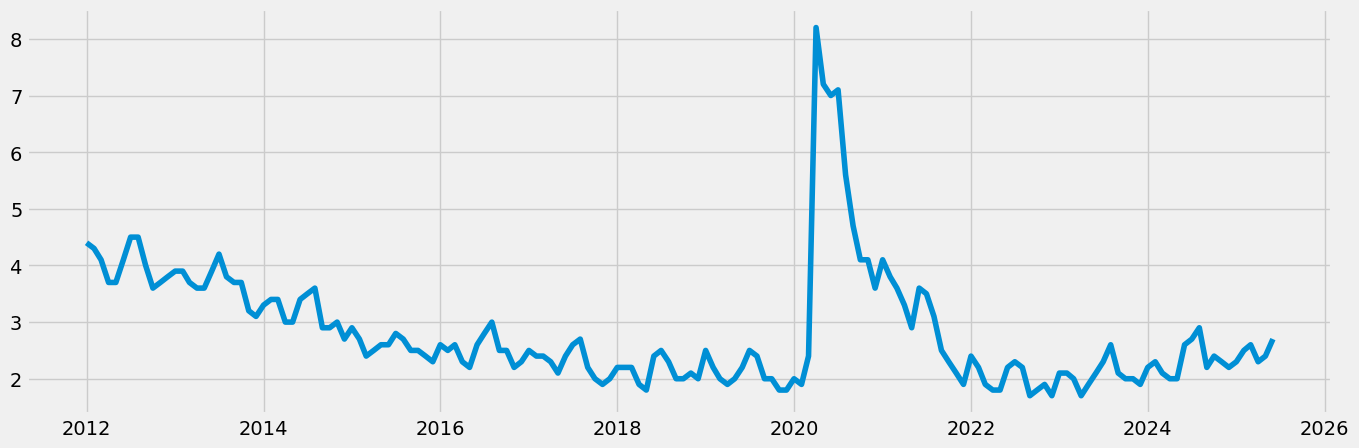

In [60]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [61]:
# Check for missing values

data_sub.isnull().sum() 

UnemploymentRate_BachelorsPlus    0
dtype: int64

In [62]:
# Check for duplicates

dups = data_sub.duplicated()
dups.sum()

127

In [70]:
# Find how many duplicates there are

print("Number of duplicates:", data_sub.duplicated().sum())

Number of duplicates: 127


In [71]:
# Look at duplicate rows

duplicates = data_sub[data_sub.duplicated(keep=False)]
print(duplicates)

            UnemploymentRate_BachelorsPlus
datetime                                  
2012-03-01                             4.1
2012-04-01                             3.7
2012-05-01                             3.7
2012-06-01                             4.1
2012-07-01                             4.5
...                                    ...
2025-02-01                             2.5
2025-03-01                             2.6
2025-04-01                             2.3
2025-05-01                             2.4
2025-06-01                             2.7

[151 rows x 1 columns]


In [72]:
# Find how many duplicates there are in original data set

print("Number of duplicates:", data.duplicated().sum())

Number of duplicates: 0


#### I don't think there are any actual duplicates. So I am leaving this alone. 

# 04. Time Series Analysis

### Line Chart:

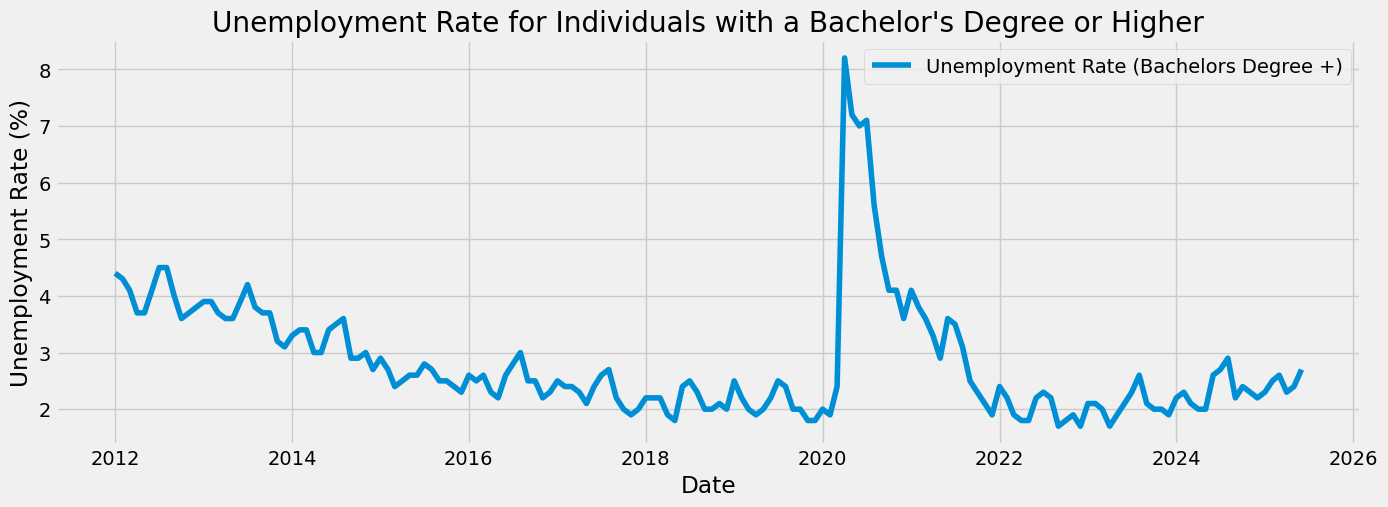

In [73]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub.index, data_sub["UnemploymentRate_BachelorsPlus"], label="Unemployment Rate (Bachelors Degree +)")
plt.title("Unemployment Rate for Individuals with a Bachelor's Degree or Higher")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.show()

### Decompose Data Components:

In [74]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [75]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

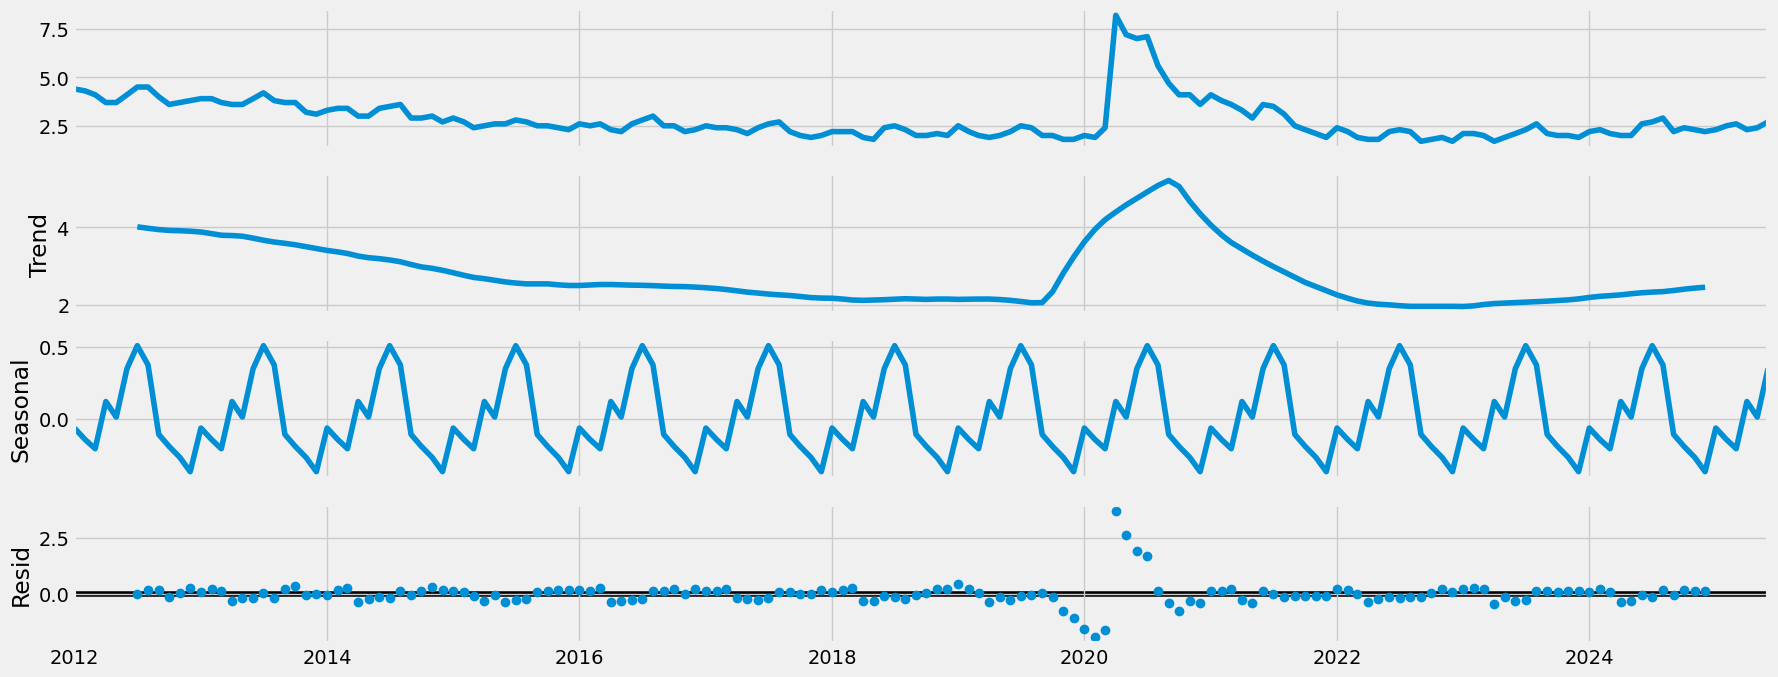

In [76]:
# Plot the separate components

decomposition.plot()
plt.show()

### Results: 

### As we know, COVID hit in 2020 which resulted in mass-layoffs and huge unemployment numbers. It's important to call that out and remember, as that describes the huge unemployment spike. 
### The first row (level), shows the regular, minimal ups and downs of unemployment, then after 2020, shows the unemployment rate slowly trying to go back to normal. 
### The Trend row smoothed out the level, so you can see that unemployment was at an all-time low before COVID changed the employment field. It looks like after 2022, unemployment rates were back to pre-2020 numbers. 
### The Seasonal line shows the seasonality of employment. You can see that the lowest unemployment happens at the end of the year - most likely due to seasonal jobs for Thanksgiving, Christmas, and New Years. 
### The final row shows consistent numbers in unemployment and most years stay close to the line (so there isn't a lot of noise), except of course the 2020 low/high of unemployment.

### Stationarity:

In [78]:
from statsmodels.tsa.stattools import adfuller 

def dickey_fuller(timeseries): 
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['UnemploymentRate_BachelorsPlus'])

Dickey-Fuller Stationarity test:
Test Statistic                  -3.605337
p-value                          0.005660
Number of Lags Used              0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


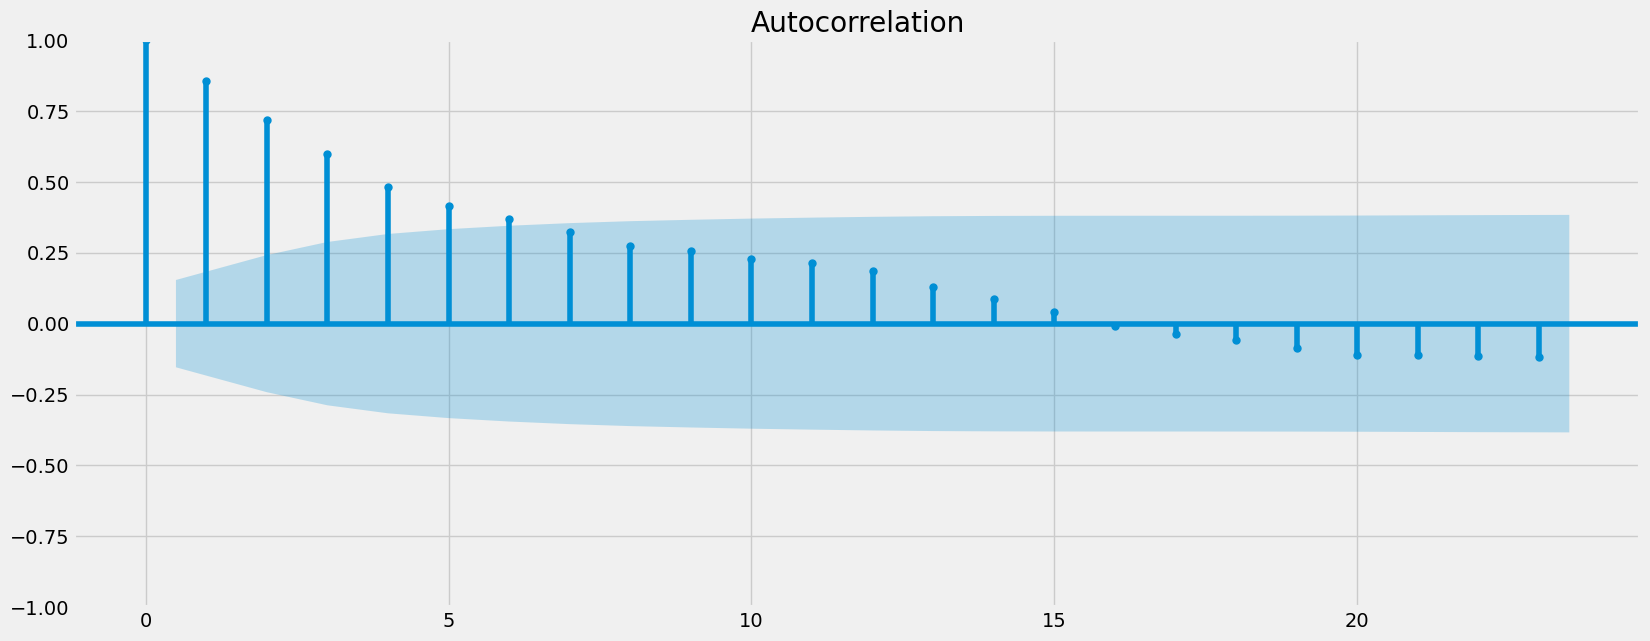

In [79]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data_sub)
plt.show()

### Results: 

### The Dickey-Fuller test was applied to the unemployment rate of adults aged 25+ who hold a bachelor's degree of higher. The test statistic (-3.605) is smaller than both the five and ten percent significance levels and the p-value is than 0.05.This means we can reject the null hypothesis and consider the series stationary.